# Rudimenti di Python per Laboratorio I

In questa lezione sono forniti alcuni rudimenti di python che permettono di svolgere semplici operazioni di analisi dei dati. Non viene data alcuna introduzione al linguaggio di programmazione e molte definizioni saranno *operative*, cioè volte ad esemplificare come si può svolgere uno dei compiti richiesti utilizzando python come strumento piuttosto che capire come effettivamente funziona il linguaggio.

## Installazione di Python

Python è facilmente installabile su qualsiasi sistema operativo se non vi è già presente (OSX, Linux).

### Sistemi Windows
Su computer **Windows** il modo più semplice di utilizzare Python è installare [Anaconda Individual Edition](https://www.anaconda.com/products/individual). A seguito dell'installazione e dell'avvio del programma si apre una shell di comando che può essere utilizzata per inserire i comandi da eseguire.
Il mio suggerimento è di creare un *Jupyter Notebook* per ciascuna delle esperienze che verranno effettuate.

### Sistemi UNIX (OSX, Linux)
Generalmente python è già installato nel sistema. Talvolta può accadere che la versione di python del sistema sia **python 2**, mentre quella più recente è la versione **3**. Si può verificare la presenza nel sistema di python3 digitando al prompt 

```
$ python3
```
a seguito del quale dovrebbe apparire qualcosa di simile
```
Python 3.9.0 (default, Dec  6 2020, 19:27:10) 
[Clang 12.0.0 (clang-1200.0.32.27)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
```

Una volta verificato che nel sistema è presente python3, la cosa più semplice è creare un ambiente virtuale contenente il software che vogliamo utilizzare (*jupyter*, *numpy*, *scipy*, *matplotlib*).

```
$ python3 -m venv laboratorioI
$ source laboratorioI/bin/activate
$ python -m pip install --upgrade pip
$ export PKGS=(scipy jupyter matplotlib)
$ for PKG in $PKGS; do pip install $PKG; done
$ deactivate
```
Questi comandi creano un ambiente virtuale di python3 con i pacchetti *scipy*, *jupyter* e *matplotlib* (e le loro dipendenze).
Per attivare l'ambiente virtuale, basta aprire un terminale e avviare il comando `activate` presente in `laboratorioI/bin`.


Per verificare che l'installazione sia andata a buon fine
```
laboratorioI $ python
>>> import scipy
>>>
```
Se il terminale non dà errori è tutto in ordine.

Per aprire una finestra del browser con jupyter notebook, basta inviare il seguente comando da shell
```
laboratorioI $ jupyter notebook
```
e si aprirà una pagina simile a questa.

Il vantaggio di utilizzare *jupyter notebook* è che si possono alternare celle di testo a celle di codice eseguibile direttamente cliccando <shift+enter>

In [1]:
import numpy as np
np.sqrt(2)

1.4142135623730951

## Utilizzo di Base

Una cella di comando può essere utilizzata per effettuare alcune operazioni di base, come operazioni aritmetiche o di definizione di variabili

In [2]:
2+3

5

In [3]:
a = 4+5

Per stampare il valore di una variabile in un dato momento si può utilizzare il comando `print`

In [4]:
print(a)
print('a = {}'.format(a))
print("a = {}".format(a))

9
a = 9
a = 9


per maggiori dettagli sull'utilizzo della funzione `format` si può consultare la [documentazione](https://docs.python.org/3.4/library/string.html#formatspec).

È importante osservare che nel notebook le celle possono non essere eseguite in maniera sequenziale per cui talvolta può capitare di compiere errori di cambiamenti di valore di una variabile o non definizione della stessa, per cui si consiglia di cliccare su `Kernel->Restart & Run All` nella barra degli strumenti quando si abbia qualche dubbio.

## Funzioni e Librerie

Il vantaggio di utilizzare python per il calcolo scientifico è che possiede molte librerie di funzioni scritte e verificate dalla comunità, per cui non si corre il rischio di "reinventare la ruota" ogni qual volta sia necessario  scrivere una funzione per svolgere una determinata operazione. Ad esempio la libreria [numpy](https://numpy.org) contiene varie funzioni matematiche di utilizzo comune scritte con una sintassi che permette un'efficiente operazione tra vettori.

In [5]:
import numpy as np
print(np.sqrt(3))
print(np.sqrt(np.array([1,2,3])))
np.sqrt(np.array([1,2,3]))

1.7320508075688772
[1.         1.41421356 1.73205081]


array([1.        , 1.41421356, 1.73205081])

Nel primo caso ho inserito come argomento della funzione `np.sqrt` un numero `int` e la funzione ha restituito un `float`. Nel secondo caso ho fornito un `numpy.array` ed ho ottenuto un altro vettore con i risultati dell'operazione per ciascun elemento del primo.

Si osservi come il *modulo* `numpy` venga caricato tramite la funzione di python `import` e le venga dato il nome `np` per brevità. Dopo questo comando ogni funzione contenuta nel modulo `numpy` può essere chiamata utilizzando la sintassi `modulo.funzione(<argomento>)`.
Ovviamente non è necessario rinominare i moduli in fase di caricamento.

In [6]:
import scipy
type(scipy)

module

Per definire una funzione originale, si utilizza il comando `def`

In [7]:
def func(x):
    y = x*x
    return y

In [8]:
y = func(2)
print(y)

4


Si osservi che la variabile `x` è passata alla funzione in modo agnostico, cioè python non si preoccupa che l'operazione che vogliamo eseguire su di essa sia valida. Questo ha grandi vantaggi, ad esempio permette di utilizzare la stessa funzione con un argomento del tutto diverso, ad esempio un vettore numpy:

In [9]:
y = func(np.array([1,2,3]))
print(y)

[1 4 9]


Ma può anche condurre ad errori nel caso venga utilizzata in modo non corretto, ad esempio se utilizzassimo come argomento una stringa

In [10]:
#y = func('a')
#print(y)

Furtunatamente in questo caso il calcolatore ci ha fornito un messaggio di errore abbastanza chiaro, ma talvolta ciò non avviene e si rischia di introdurre un *bug* nel sistema.

## Operazioni Utili per il Laboratorio

Questa lezione non può coprire tutti i dettagli di un linguaggio di programmazione così complesso, per cui a seguito dei rudimenti, tratteremo alcuni argomenti specifici di utilità per le esperienze di laboratorio
- Disegno di dati e funzioni su un grafico
- Interpolazione
- Disegno della retta di interpolazione sul grafico
- Calcolo del $\chi^2$

### Disegno dei dati e funzioni su un grafico

Per disegnare i dati su un grafico si può utilizzare la libreria [matplotlib](https://matplotlib.org). In essa sono presenti funzioni per costruire istogrammi e disegnare funzioni.

#### Istogrammi

Supponiamo di voler disegnare un istogramma a partire dalle seguenti misure

|  |  |  |  |  | 
| --- | --- | --- | --- | --- | 
| 3.10 | 2.99 | 2.93 | 3.12 | 3.04 | 
| 2.97 | 2.87 | 2.78 | 3.09 | 3.19 | 
| 3.03 | 3.11 | 2.87 | 2.98 | 2.89 | 
| 2.99 | 2.89 | 2.91 | 3.03 | 3.05 |

Per prima cosa costruiamo un vettore con le misure

In [11]:
x = np.array([3.10,2.99,2.93,3.12,3.04,
              2.97,2.87,2.78,3.09,3.19,
              3.03,3.11,2.87,2.98,2.89,
              2.99,2.89,2.91,3.03,3.05])

Quindi carichiamo il modulo `pyplot` dal modulo `matplotlib` e lo chiamiamo `plt` per brevità. In questo modulo è presente la funzione [`hist`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) che permette di disegnare un istogramma

(array([1., 0., 4., 2., 2., 2., 4., 2., 2., 1.]),
 array([2.78 , 2.821, 2.862, 2.903, 2.944, 2.985, 3.026, 3.067, 3.108,
        3.149, 3.19 ]),
 <BarContainer object of 10 artists>)

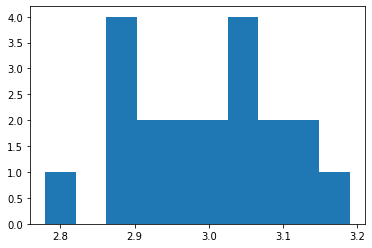

In [12]:
from matplotlib import pyplot as plt
plt.hist(x)

Di base, la funzione disegna raccoglie gli elementi del vettore in un istogramma con 10 intervalli equipollenti, si può scegliere di utilizzare meno intervalli aggiungendo l'argomento `bins`

(array([1., 6., 4., 6., 3.]),
 array([2.78 , 2.862, 2.944, 3.026, 3.108, 3.19 ]),
 <BarContainer object of 5 artists>)

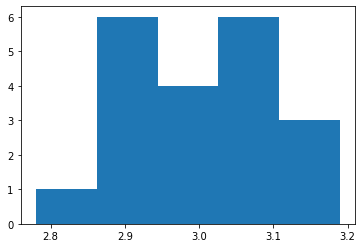

In [13]:
plt.hist(x,bins=5)

O addirittura definire intervalli di ampiezza diversa...

(array([5., 6., 9.]),
 array([2.7, 2.9, 3. , 3.2]),
 <BarContainer object of 3 artists>)

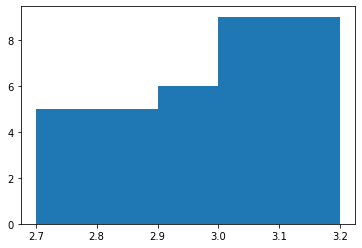

In [14]:
plt.hist(x,bins=[2.7,2.9,3,3.2])

Supponiamo che i dati siano distribuiti secondo una distribuzione di Gauss, possiamo calcolarne la media e la deviazione standard scrivendo una funzione  originale oppure utilizzando quelle fornite da `numpy`

In [15]:
def media(x):
    m = 0
    for i in x:
        m += i # += incrementa la variabile somma di i
    m /= len(x) # len() restituisce il numero di elementi del vettore e /= divide la variabile m per len(x)
    return m
print(media(x))
print(np.mean(x))
print('x = {0:.2f} ± {1:.2f}'.format(np.mean(x),np.std(x)))
print('x = {m:.2f} ± {s:.2f}'.format(m=np.mean(x),s=np.std(x))) # ulteriore esempio di formattazione, si noti la possibilità di scegliere la posizione delle variabili nella stampa

2.9915
2.9915
x = 2.99 ± 0.10
x = 2.99 ± 0.10


Come atteso, la funzione da noi definita e la funzione di `numpy` forniscono lo stesso risultato.
Nell'ultima stampa si è utilizzata anche la funzione `numpy.std` per calcolare la deviazione standard dei dati nel vettore.
Tutto ciò che segue il carattere `#` nella linea è un commento: viene ignorato dal calcolatore, ma è utile al programmatore.

**Esercizio**: Scrivere una funzione originale che calcola la deviazione standard degli elementi di un vettore e confrontarne il risultato con la funzione `numpy.std`

#### Sovrapposizione di una funzione al grafico

Per disegnare la distribuzione di Gauss corrispondente ai dati nel vettore `x` si può utilizzare la funzione `pyplot.plt` unita alla definizione della funzione da disegnare. Per semplicità costruiamo l'istogramma delle frequenze, così da non dover cambiare la noramlizzazione della funzione di Gauss.

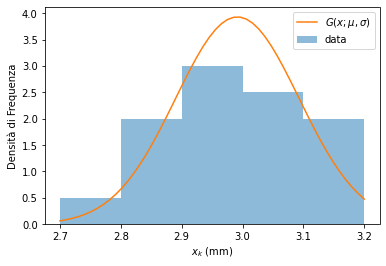

In [16]:
# Definisco la funzione
def gaus(x,m,s):
    h = 1./s/np.sqrt(2)
    z = x-m
    return np.exp(-np.power(h*z, 2.)) *h / np.sqrt(np.pi)

# Definisco il numero degli intervalli, minimo, massimo e disegno l'istogramma
num_bins = 5
xmin, xmax = np.floor(10.*min(x))/10, np.ceil(10.*max(x))/10 # scelgo minimo e massimo arrotondando (oss: floor e ceil restituiscono un intero, io voglio arrotondare a 0.1, da cui la moltiplicazione e divisione per 10)
plt.hist(x, num_bins, range = [xmin, xmax], alpha=0.5, density=True, label='data')

# Abbellimento del grafico
xt = [round(xmin+0.1*i,1) for i in range(num_bins+1)] # abbellimento del grafico: scelgo i punti dove disegnare gli intervalli
plt.xticks(xt, [str(i) for i in xt]) # scrivo le tacchette sull'asse x
plt.xlabel('$x_k$ (mm)') # titolo asse x
plt.ylabel('Densità di Frequenza') # titolo asse y

# Disegno la funzione
mean, sigma = np.mean(x),np.std(x) # calcolo media e deviazione standard
t = np.linspace(xmin,xmax) # questa funzione definisce un vettore ad alta densità per calcolare la funzione da disegnare lungo l'asse x
plt.plot(t,gaus(t,mean, sigma),label=r"$G(x;\mu,\sigma)$")
plt.legend() # aggiungo una legenda

#### Disegno di un grafico con barre di errore

Nella maggior parte delle esperienze, sarete chiamati a disegnare dei grafici con barre di errore per rappresentare i risultati delle misure. Suppongo di aver misurato il tempo di discesa di un carrellino al variare dell'angolo di inclinazione di un piano inclinato e di aver ottenuto i seguenti risultati

|  $\frac{1}{\sin\alpha}$  |  $t^2$ $(s^2)$ |
|---|---|
| 2.00 | 0.18 ± 0.10 |
| 2.37 | 0.22 ± 0.09 |
| 2.92 | 0.36 ± 0.17 |
| 3.86 | 0.44 ± 0.12 |
| 5.76 | 0.66 ± 0.22 |
| 11.47 | 1.12 ± 0.22 |

Si creano dei vettori con i valori ottenuti:

In [17]:
X = np.array([11.47, 5.76, 3.86, 2.92, 2.37, 2.0])
Y = np.array([1.12, 0.66, 0.44, 0.36, 0.22, 0.18])
sy = 0.15
sY = np.array(sy*np.ones(len(Y)))

Quindi si può utilizzare la funzione `pyplot.errorbar` per disegnare il grafico dei valori `Y` corrispondenti a `X` con la barra di errore simmetrica `sY` (ovviamente i vettori devono avere la stessa dimensione perché la funzione dia un risultato)

Text(0, 0.5, '$t^2 (s^2)$')

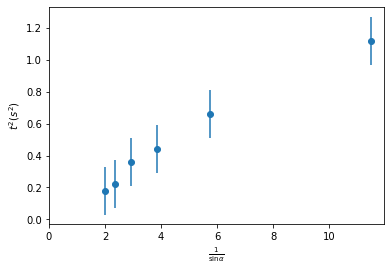

In [27]:
plt.errorbar(X,Y,sY, fmt='o', ls='none', label='data')
# abbellimenti
plt.xlim(left=0)
plt.xlabel(r'$\frac{1}{\sin\alpha}$')
plt.ylabel(r'$t^2 (s^2)$')

### Effettuare un'interpolazione

La cosa più semplice per effettuare un'interpolazione è scrivere le funzioni necessarie a partire dalle formule discusse a lezione. In questo esempio si utilizza una retta passante per l'origine $y = kx$:

$$
k = \frac{\sum_{i=1}^N x_iy_i}{\sum_{i=1}^N x^2_i} \qquad \sigma_k^2 =  \frac{\sigma_y^2}{\sum_{i=1}^N x^2_i}
$$

Si può scrivere una funzione che calcoli $k$ e $\sigma_k$ a partire dai vettori `X`, `Y` e l'incertezza `sy` oppure eseguire le operazioni richieste in una cella (il vantaggio della funzione è che può essere riutilizzata per vari set di dati senza dover ricopiare le operazioni di volta in volta).

In [19]:
def InterpolazioneLineareOrigine(x,y,sy):
    '''
    Dati due vettori di pari dimensione x, y e l'incertezza sy si può interpolare la retta passante per l'origine con il metodo dei minimi quadrati
    '''
    # controllo che x e y abbiano pari dimensione diversa da 0
    if len(x) != len(y) or len(x) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print("L'incertezza non può essere 0")
        return 0
    # calcolo le sommatorie
    sumxy = 0
    sumx2 = 0
    for i in range(len(x)): # range(n) = [0,1,2,..,n-1]
        sumxy += x[i]*y[i]
        sumx2 += x[i]*x[i]
    k = sumxy/sumx2
    sk = sy/np.sqrt(sumx2)
    return (k,sk)

**Esercizio**: si scriva una funzione per effettuare l'interpolazione di una retta generica

**Esercizio**: si scriva una funzione per effettuare l'interpolazione di una retta generica con incertezze variabili

Procedo all'interpolazione.

In [20]:
res = InterpolazioneLineareOrigine(X,Y,sy)
print(res)
print('k = {:.2f} ± {:.2f}'.format(res[0],res[1]))

(0.10253239182248688, 0.010665925249983442)
k = 0.10 ± 0.01


### Disegno della retta interpolata sui dati

Disegno la retta interpolata sui dati, similmente a quanto fatto quando è stata disegnata la funzione di Gauss

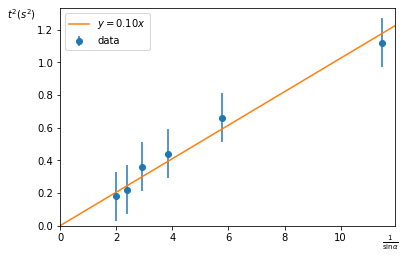

In [21]:
# Definisco la funzione che voglio disegnare
def line(x,m,q=0):
    y = m*x+q
    return y

# Disegno il grafico con barre di errore
plt.errorbar(X,Y,sY, fmt='o', ls='none', label='data')
# abbellimenti
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(max(X), -0.1*(max(Y)-min(Y)+2*max(sY)), r'$\frac{1}{\sin\alpha}$')
plt.text(-0.2*(max(X)-min(X)), max(Y)+max(sY), r'$t^2 (s^2)$')

# Disegno la funzione
xmin, xmax = 0, max(X)+0.1*(max(X)-min(X))
t = np.linspace(xmin,xmax) # questa funzione definisce un vettore ad alta densità per calcolare la funzione da disegnare lungo l'asse x
plt.plot(t,line(t,res[0]),label=r"$y = {:.2f}x$".format(res[0]))
plt.legend() # aggiungo una legenda

### Calcolo del $\chi^2$

Per calcolare il $\chi^2$ si può di nuovo scrivere una funzione (o eseguire le operazioni in una cella):

$$
\chi^2_0 = \sum_{i=1}^N \left(\frac{y_i - k x_i}{\sigma_{y_i}}\right)^2= \frac{\sum_{i=1}^N \left(y_i - k x_i\right)^2}{\sigma_{y}^2}
$$

In [22]:
def chisq(y,e,sy):
    '''
    y: vettore delle misure
    e: vettore dei valori attesi per i valori di x considerati
    sy: incertezza sulle misure
    '''
    if len(y)!=len(e) or len(y) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print('L\'incertezza non può essere 0')
        return 0
    c2 = 0
    for i in range(len(y)): c2 += (y[i]-e[i])*(y[i]-e[i])
    c2 /= sy*sy
    return c2

In [23]:
chi2v = chisq(Y,line(X,res[0]),sy)
print('chi2 = {:.2f}'.format(chi2v))

chi2 = 0.66


Il test del $\chi^2$ si può effettuare calcolando il numero di gradi di libertà del problema (n-1 in questo caso) e utilizzando la *classe* `chi2` del *modulo* `scipy.stats` che permette di calcolare la funzione cumulativa (`cdf`) della distribuzione del $\chi^2$ con *d* gradi di libertà fino ad un dato valore (`chi2v` nel nostro caso)

$$
P_0 = P(\chi^2 \geq \chi^2_0) = \int_{\chi^2_0}^{+\infty}f(\chi^2;d)\mathrm{d}\chi^2 = 1- \int_{0}^{\chi^2_0}f(\chi^2;d)\mathrm{d}\chi^2
$$

In [24]:
from scipy.stats import chi2
d = len(Y)-1
pchi2 = 1-chi2.cdf(chi2v,d)
print('P(chi2) = {:.1f}%'.format(100.*pchi2))

P(chi2) = 98.5%
